<a href="https://colab.research.google.com/github/urmilaahire26/DataScienceTask1/blob/main/DSTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

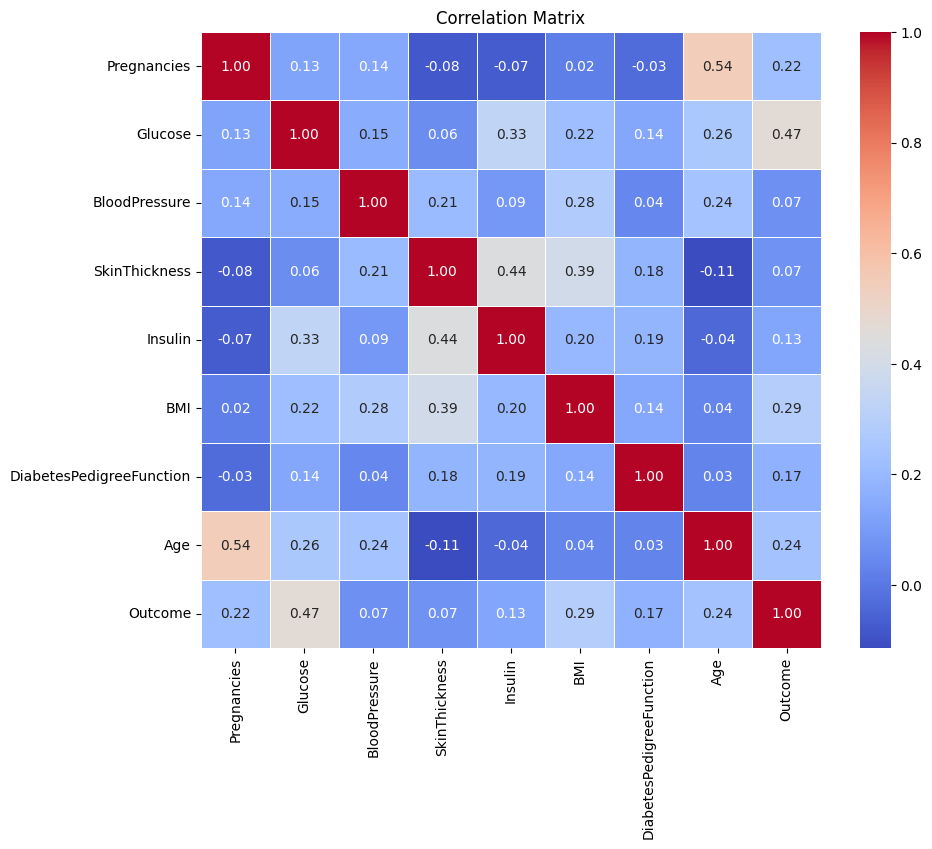

Evaluating Logistic Regression:
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81        99
         1.0       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.8147


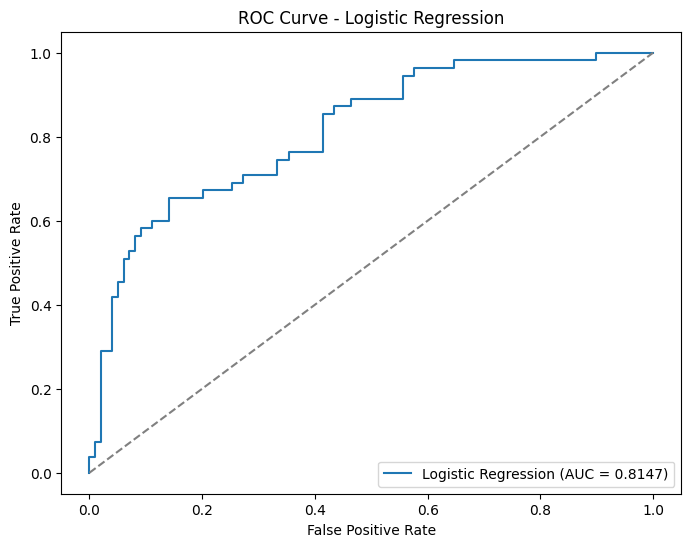

Evaluating SVM:
Confusion Matrix:
[[82 17]
 [24 31]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80        99
         1.0       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

ROC-AUC: 0.8051


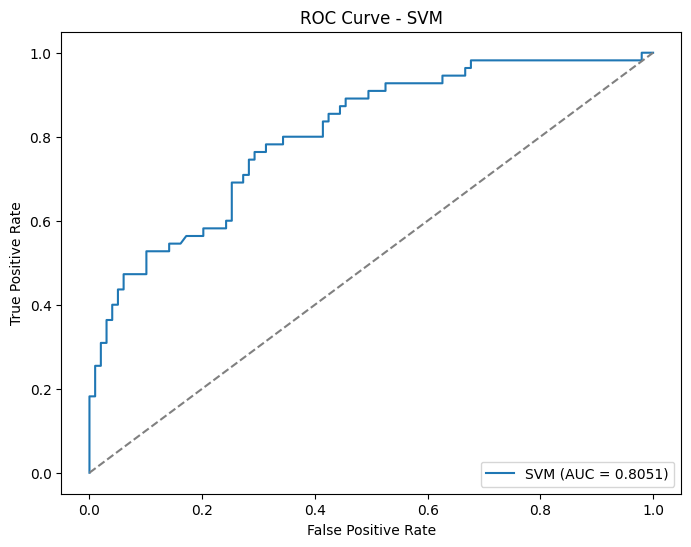

Evaluating Decision Tree:
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        99
         1.0       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.8125


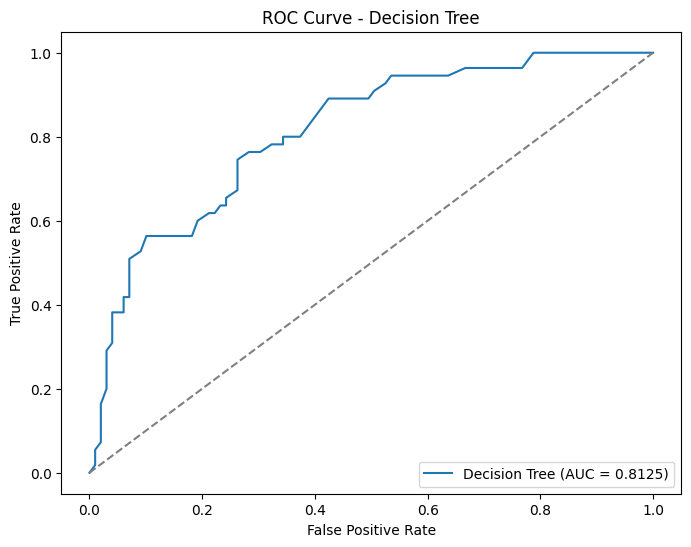

Evaluating Random Forest:
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.78      0.78        99
         1.0       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

ROC-AUC: 0.8125


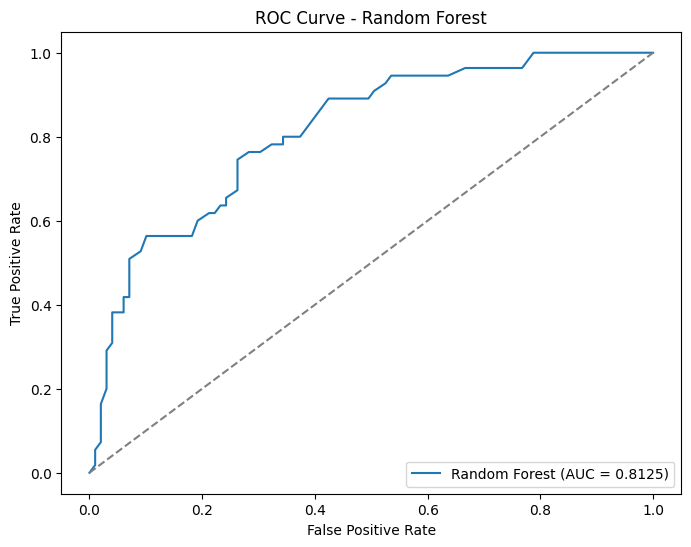

In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load dataset (you can replace with your own dataset)
# Example dataset: Pima Indians Diabetes Database (available online)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=columns)

# Check for missing values
data.isnull().sum()

# Handle missing data (we will replace with the median value)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Split the dataset into features (X) and target (y)
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Visualizing the correlation between features using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Train and evaluate different classification models

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# 2. Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# 4. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

# Model evaluation using ROC-AUC, confusion matrix, and classification report
models = {'Logistic Regression': log_reg_pred, 'SVM': svc_pred, 'Decision Tree': dt_pred, 'Random Forest': rf_pred}

for model_name, predictions in models.items():
    print(f"Evaluating {model_name}:")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, predictions)}")
    print(f"Classification Report:\n{classification_report(y_test, predictions)}")

    # ROC-AUC Score
    if model_name == 'Logistic Regression':  # SVM and others have probabilities for ROC-AUC calculation
        probs = log_reg.predict_proba(X_test_scaled)[:, 1]
    elif model_name == 'SVM':
        probs = svc.predict_proba(X_test_scaled)[:, 1]
    else:
        probs = rf.predict_proba(X_test_scaled)[:, 1]

    auc = roc_auc_score(y_test, probs)
    print(f"ROC-AUC: {auc:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
